Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()


In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print(daily_engagement[0])
print(project_submissions[0])

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    engagement_record['account_key'] = engagement_record['acct']
    
daily_engagement[0]

{'account_key': u'0',
 u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def get_num_rows(filename):
    return len(filename)

def get_num_unique_keys(filename):
    account_set = set()
    for ea in filename:
        account_set.add(ea['account_key'])
    return len(account_set)

enrollment_num_rows = get_num_rows(enrollments)
enrollment_num_unique_students = get_num_unique_keys(enrollments)

engagement_num_rows = get_num_rows(daily_engagement)
engagement_num_unique_students = get_num_unique_keys(daily_engagement)

submission_num_rows = get_num_rows(project_submissions)
submission_num_unique_students = get_num_unique_keys(project_submissions)

print engagement_num_rows
print engagement_num_unique_students


136240
1237


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
print daily_engagement[0]
for each in daily_engagement:
    each.pop('acct')
    
print daily_engagement[0]

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'acct': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
def get_acc_unique_set(filename):
    account_set = set()
    for ea in filename:
        account_set.add(ea['account_key'])
    return account_set

engagement_set = get_acc_unique_set(daily_engagement)
for row in enrollments:
    if row['account_key'] not in engagement_set:
        print row
        break
        

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

problem_count = 0
for row in enrollments:
    if row['account_key'] not in engagement_set:
        if row['join_date'] != row['cancel_date']:
            problem_count += 1
            
print(problem_count)

3


## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [13]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
paid_students = dict()
print len(non_udacity_enrollments)
for row in non_udacity_enrollments:
    if row['days_to_cancel'] is None or row['days_to_cancel'] > 7:
        acct_key = row['account_key']
        enrollment_date = row['join_date']
        if acct_key not in paid_students or \
                enrollment_date > paid_students[acct_key]:
            paid_students[acct_key] = enrollment_date

len(paid_students)

1622


995

## Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [15]:
print paid_students['1']
if '0' in paid_students:
    print 'a'

2015-05-06 00:00:00
a


In [16]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
    
paid_engagement_in_first_week = list()
for row in daily_engagement:
    acct = row['account_key']
    engagement_date = row['utc_date']
    if acct in paid_students:
        if within_one_week(paid_students[acct], engagement_date):
            paid_engagement_in_first_week.append(row)
    
print len(paid_engagement_in_first_week)

6919


## Exploring Student Engagement

In [17]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                  'account_key')

In [18]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def get_total_by_account(engagement_dict, key):
    total_x_by_account = {}
    for account_key, engagement_for_student in engagement_dict.items():
        count = 0
        for engagement_record in engagement_for_student:
            count += engagement_record[key]
        total_x_by_account[account_key] = count
    return total_x_by_account

total_minutes_by_account = get_total_by_account(engagement_by_account, 'total_minutes_visited')

In [19]:
import numpy as np

def print_mean_sd_min_max(total_x_by_account):
    total_x = total_x_by_account.values()
    print 'Mean:', np.mean(total_x)
    print 'Standard deviation:', np.std(total_x)
    print 'Minimum:', np.min(total_x)
    print 'Maximum:', np.max(total_x)

# Summarize the data about minutes spent in the classroom
print_mean_sd_min_max(total_minutes_by_account)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [20]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
for k, v in total_minutes_by_account.items():
    if v > 10000:
        print k, v
        
#print engagement_by_account['108']


## Lessons Completed in First Week

In [21]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_complete_lessons_by_account = get_total_by_account(engagement_by_account, 'lessons_completed')
print_mean_sd_min_max(total_complete_lessons_by_account)



Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [22]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

for row in paid_engagement_in_first_week:
    if row['num_courses_visited'] > 0:
        row['has_visited'] = 1
    else: 
        row['has_visited'] = 0
        
engagement_by_account = group_data(paid_engagement_in_first_week,
                                  'account_key')
total_class_visits_by_account = get_total_by_account(engagement_by_account, 'has_visited')
print_mean_sd_min_max(total_class_visits_by_account)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [23]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
    
pass_subway_project = set()
passing_engagement = list()
non_passing_engagement = list()

for submission_row in non_udacity_submissions:
    if submission_row['lesson_key'] in subway_project_lesson_keys:
        if submission_row['assigned_rating'] == 'PASSED' or  submission_row['assigned_rating'] == 'DISTINCTION':
            pass_subway_project.add(submission_row['account_key'])


for engagement_row in paid_engagement_in_first_week:
    if engagement_row['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_row)
    else:
        non_passing_engagement.append(engagement_row)


print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

In [24]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point woulbd be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

## Grouping by Passing/ Non-Passing Engagements
passing_engagement_by_account = group_data(passing_engagement,
                                  'account_key')
total_class_visits_by_passing_account = get_total_by_account(passing_engagement_by_account, 
                                                     'has_visited')

## Comparing Total Class Visits For First Week

print("Passing Engagement's Days Visited")
print_mean_sd_min_max(total_class_visits_by_passing_account)

non_passing_engagement_by_account = group_data(non_passing_engagement,
                                  'account_key')
total_class_visits_by_non_passing_account = get_total_by_account(non_passing_engagement_by_account, 
                                                     'has_visited')

print("\nNon-Passing Engagement's Days Visited")
print_mean_sd_min_max(total_class_visits_by_non_passing_account)


Passing Engagement's Days Visited
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7

Non-Passing Engagement's Days Visited
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


In [25]:
## Comparing Minutes Spend For First Week

total_minutes_by_passing_account = get_total_by_account(passing_engagement_by_account, 
                                                     'total_minutes_visited')
total_minutes_by_non_passing_account = get_total_by_account(non_passing_engagement_by_account, 
                                                     'total_minutes_visited')


print("Passing Engagement's Minutes Visited")
print_mean_sd_min_max(total_minutes_by_passing_account)

print("\nNon-Passing Engagement's Minutes Visited")
print_mean_sd_min_max(total_minutes_by_non_passing_account)

Passing Engagement's Minutes Visited
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645

Non-Passing Engagement's Minutes Visited
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


In [26]:
## Comparing Lessons Completed For First Week

lessons_completed_by_passing_account = get_total_by_account(passing_engagement_by_account, 
                                                     'lessons_completed')
lessons_completed_by_non_passing_account = get_total_by_account(non_passing_engagement_by_account, 
                                                     'lessons_completed')


print("Passing Engagement's Lessons Completed")
print_mean_sd_min_max(lessons_completed_by_passing_account)

print("\nNon-Passing Engagement's Lessons Completed")
print_mean_sd_min_max(lessons_completed_by_non_passing_account)

Passing Engagement's Lessons Completed
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36

Non-Passing Engagement's Lessons Completed
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


## Making Histograms

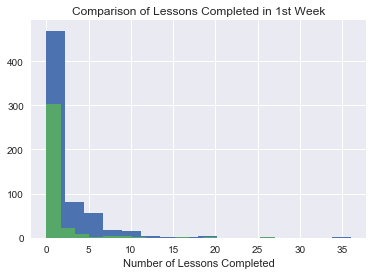

In [48]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(lessons_completed_by_passing_account.values(), bins=16)
plt.hist(lessons_completed_by_non_passing_account.values(), bins=16)
plt.title("Comparison of Lessons Completed in 1st Week")
plt.xlabel("Number of Lessons Completed")

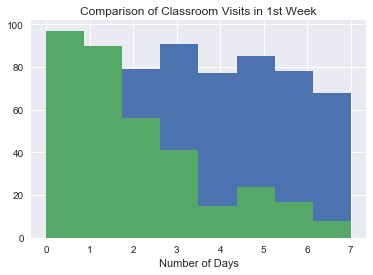

In [51]:
plt.hist(total_class_visits_by_passing_account.values(), bins=8)
plt.hist(total_class_visits_by_non_passing_account.values(), bins=8)
plt.title("Comparison of Classroom Visits in 1st Week")
plt.xlabel("Number of Days")

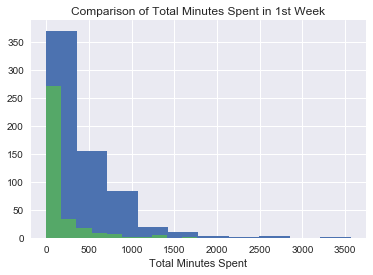

In [49]:
plt.hist(total_minutes_by_passing_account.values())
plt.hist(total_minutes_by_non_passing_account.values())
plt.title("Comparison of Total Minutes Spent in 1st Week")
plt.xlabel("Total Minutes Spent")

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

## AS ABOVE